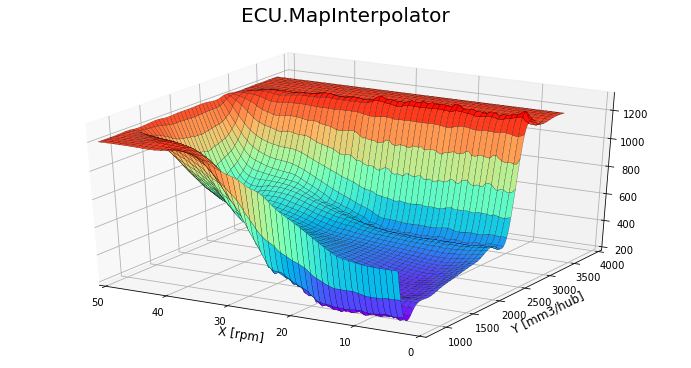

In [77]:
import numpy
import scipy.interpolate
import matplotlib.pyplot
import matplotlib.mlab
#from mpl_toolkits.mplot3d import Axes3D
matplotlib.pyplot.figure(figsize=(12, 6))

f = numpy.genfromtxt('airctl.csv', dtype=float, names=True) 
x = f['X']
y = f['Y']
z = f['W']

xi = numpy.linspace(min(x), max(x), 100)
yi = numpy.linspace(min(y), max(y), 100)
zi = scipy.interpolate.griddata((x,y), z, (xi[None,:], yi[:,None]), method='cubic', rescale=True)

ax = matplotlib.pyplot.gca(projection='3d')
ax.set_ylim(700, 4000)
ax.set_xlim(50, 0)
ax.set_title('ECU.MapInterpolator', fontsize=20, y=1.1)
matplotlib.pyplot.xlabel('X [rpm]', fontsize=12)
matplotlib.pyplot.ylabel('Y [mm3/hub]', fontsize=12)

xim, yim = numpy.meshgrid(xi, yi)
surf = ax.plot_surface(yim, xim, zi, cmap='rainbow', edgecolors='k', linewidth=0.2, antialiased=True, shade=True)
#ax.view_init(elev=45, azim=-40) # rotate vertical, horizontal
#ax.scatter(y, x, c=z)
#matplotlib.pyplot.colorbar(surf, shrink=0.8, aspect=10) # legend